In [1]:
import keras
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
%matplotlib inline

## load data

In [8]:
# !wget https://www.dropbox.com/s/aq8nzoocja35zg3/food-binary.zip?dl=0

In [9]:
# !unzip food-binary.zip\?dl\=0

In [12]:
img = load_img('food-binary/Dosa/img39.jpeg')

In [13]:
x = img_to_array(img)

In [14]:
x.shape

(194, 259, 3)

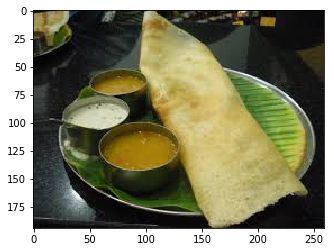

In [15]:
plt.imshow(x/255.)

In [16]:
img_generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(128,128), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [19]:
train_generator = get_batches('food-binary/', 'training')
val_generator = get_batches('food-binary/', 'validation')

Found 260 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'Dosa': 0, 'NoDosa': 1}

## Build CNN model

In [21]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(128, 128, 3)))
model.add(Flatten())
model.add(Dense(units=2, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [23]:
batch_size = 28

In [25]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        validation_steps=800 // batch_size)

Epoch 1/1
71/71 [==============================] - 6s 88ms/step - loss: 0.4258 - acc: 0.8152 - val_loss: 0.6009 - val_acc: 0.6478


## CNN model

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [27]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [28]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [30]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/1
71/71 [==============================] - 6s 88ms/step - loss: 0.6813 - acc: 0.6708 - val_loss: 0.6454 - val_acc: 0.6798

Epoch 00001: val_loss improved from inf to 0.64542, saving model to model-001.h5


## Image augmentation

In [31]:
img_generator = ImageDataGenerator(rotation_range=90.,
                                   featurewise_center=True, 
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   vertical_flip=True,
                                   zoom_range=0.4,
                                   featurewise_std_normalization=True,
                                   width_shift_range=20,
                                   height_shift_range=20,
                                   validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(128,128), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [32]:
train_generator = get_batches('food-binary/', 'training')
val_generator = get_batches('food-binary/', 'validation')

Found 260 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [34]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [35]:
checkpoint = ModelCheckpoint('model-imgaug-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [36]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/1


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:967: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


71/71 [==============================] - 9s 130ms/step - loss: 0.6596 - acc: 0.6584 - val_loss: 0.6424 - val_acc: 0.6798

Epoch 00001: val_loss improved from inf to 0.64242, saving model to model-imgaug-001.h5


## CNN Model 2

In [37]:
train_generator = get_batches('food-binary/', 'training')
val_generator = get_batches('food-binary/', 'validation')

Found 260 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [39]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [40]:
checkpoint = ModelCheckpoint('model-imgaugII-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [41]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/1


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:967: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


71/71 [==============================] - 9s 126ms/step - loss: 0.6613 - acc: 0.6602 - val_loss: 0.6558 - val_acc: 0.6798

Epoch 00001: val_loss improved from inf to 0.65580, saving model to model-imgaugII-001.h5


## Transfer Learning

In [42]:
from keras.applications import ResNet50

In [43]:
img_generator = ImageDataGenerator(rotation_range=90.,
                                   featurewise_center=True, 
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   vertical_flip=True,
                                   zoom_range=0.4,
                                   featurewise_std_normalization=True,
                                   width_shift_range=20,
                                   height_shift_range=20,
                                   validation_split=0.2, rescale=1./255)
def get_batches(path, subset, gen=img_generator, 
                shuffle=True, batch_size=8, class_mode='categorical'): 
    return gen.flow_from_directory(path, target_size=(228,228), 
                                   class_mode=class_mode, shuffle=shuffle, batch_size=batch_size, subset=subset)

In [44]:
train_generator = get_batches('food-binary/', 'training')
val_generator = get_batches('food-binary/', 'validation')

Found 260 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [45]:
base_model = ResNet50(include_top=False, input_shape=(228,228,3))

94658560/94653016 [==============================] - 1s 0us/step


In [46]:
batch_size=28

In [47]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- we have 10 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

In [48]:
checkpoint = ModelCheckpoint('model-trflrn-{epoch:03d}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

In [49]:
m.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [50]:
m.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/1


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:967: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


71/71 [==============================] - 41s 584ms/step - loss: 1.3008 - acc: 0.6461 - val_loss: 1.4405 - val_acc: 0.6650

Epoch 00001: val_acc improved from -inf to 0.66502, saving model to model-trflrn-001.h5


## Unfreeze & Train base model

In [51]:
train_generator = get_batches('food-binary/', 'training')
val_generator = get_batches('food-binary/', 'validation')

Found 260 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [52]:
base_model = ResNet50(include_top=False, input_shape=(228,228,3))

In [53]:
batch_size=8

In [54]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- we have 10 classes
predictions = Dense(2, activation='sigmoid')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

In [55]:
checkpoint = ModelCheckpoint('model-trflrn-unfreeze-{epoch:03d}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

In [56]:
for layer in base_model.layers:
    layer.trainable = False

Retrain the last 3 layers of base model with image augmentation

In [57]:
for layer in m.layers[:47]:
   layer.trainable = False
for layer in m.layers[47:]:
   layer.trainable = True

In [58]:
m.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
m.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=1,
        validation_data=val_generator,
        callbacks=[checkpoint],
        validation_steps=800 // batch_size)

Epoch 1/1


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:967: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


250/250 [==============================] - 102s 406ms/step - loss: 0.6373 - acc: 0.6750 - val_loss: 0.6762 - val_acc: 0.6473

Epoch 00001: val_acc improved from -inf to 0.64730, saving model to model-trflrn-unfreeze-001.h5
